# Data Analysis using Python

Problem Statement for analysis:
To find out insights into pricing stategie through comprehensive examination of variable 

#Property type

#Geographic demand

#Season

This study will dive into airbnb datset to extract meaningful insight,trends and suggest data driven strategies for optimizing both host offerings and guest experiences.

# Data Uploading

In [35]:
# Import python libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

%matplotlib inline

In [36]:
df_cal=pd.read_csv('calendar.csv')
df_lis=pd.read_csv('listings.csv')
df_rev=pd.read_csv('reviews.csv')

In [37]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [38]:
df_lis.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [39]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [40]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [41]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [42]:
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Transformation

In [43]:
# Changing price in calender from object type to float
df_cal['price'] = df_cal['price'].str.replace("[$, ]", "").astype("float")

#converting the date column into datetime
df_cal['date'] = pd.to_datetime(df_cal['date'])

#creating a column for month of year
df_cal['month'] = df_cal['date'].dt.month
df_cal['month'] = df_cal['month'].apply(lambda x: calendar.month_abbr[x])

df_cal.head()


C:\Users\Rohit.Ojha\AppData\Local\Temp\ipykernel_24312\1555753799.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cal['price'] = df_cal['price'].str.replace("[$, ]", "").astype("float")


,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,Jan
1,241032,2016-01-05,t,85.0,Jan
2,241032,2016-01-06,f,NaN,Jan
3,241032,2016-01-07,f,NaN,Jan
4,241032,2016-01-08,f,NaN,Jan


In [44]:
# Changing price in listings from object type to float
df_lis['price'] = df_lis['price'].str.replace("[$, ]", "").astype("float")

C:\Users\Rohit.Ojha\AppData\Local\Temp\ipykernel_24312\3704842719.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_lis['price'] = df_lis['price'].str.replace("[$, ]", "").astype("float")


# Analyzing and Visualizing

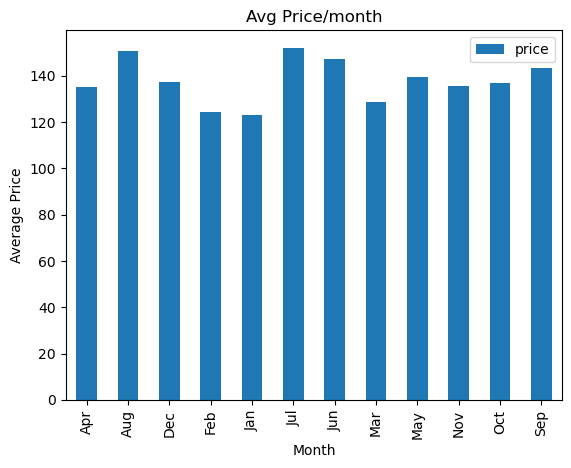

In [45]:
### Months with highest price
mth_lis=df_cal.groupby('month')['price'].mean()
mth_lis.plot(kind="bar");
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title("Avg Price/month")
plt.legend();
plt.savefig('9.png',bbox_inches='tight')

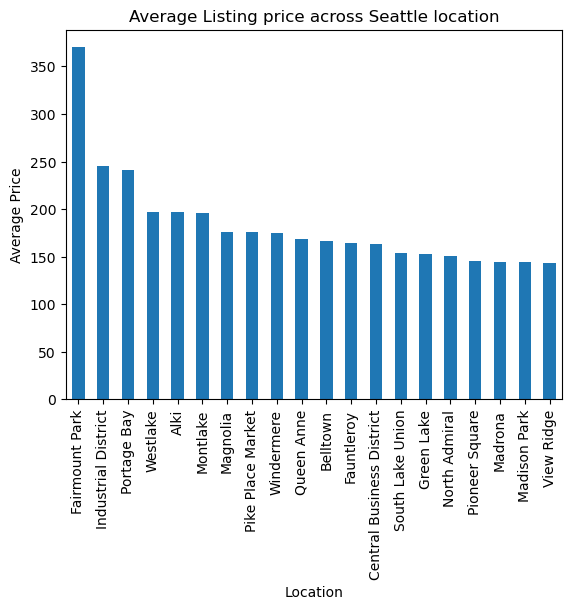

In [46]:
# grouped neighbourhood 
mean_prc=df_lis.groupby('neighbourhood')['price'].mean()
mean_prc.nlargest(20).plot(kind="bar");
plt.title("Average Listing price across Seattle location");
plt.xlabel('Location');
plt.ylabel('Average Price');
plt.savefig('7.png',bbox_inches='tight')

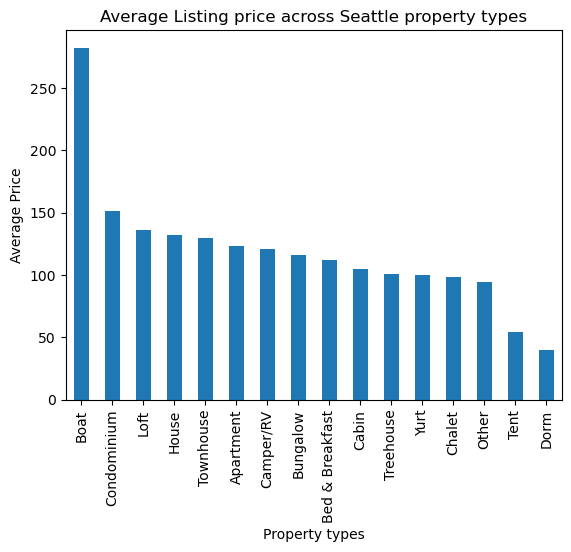

In [47]:
# grouped neighbourhood 
mean_prc=df_lis.groupby('property_type')['price'].mean()
mean_prc.nlargest(20).plot(kind="bar");
plt.title("Average Listing price across Seattle property types");
plt.xlabel('Property types');
plt.ylabel('Average Price');
plt.savefig('7.png',bbox_inches='tight')

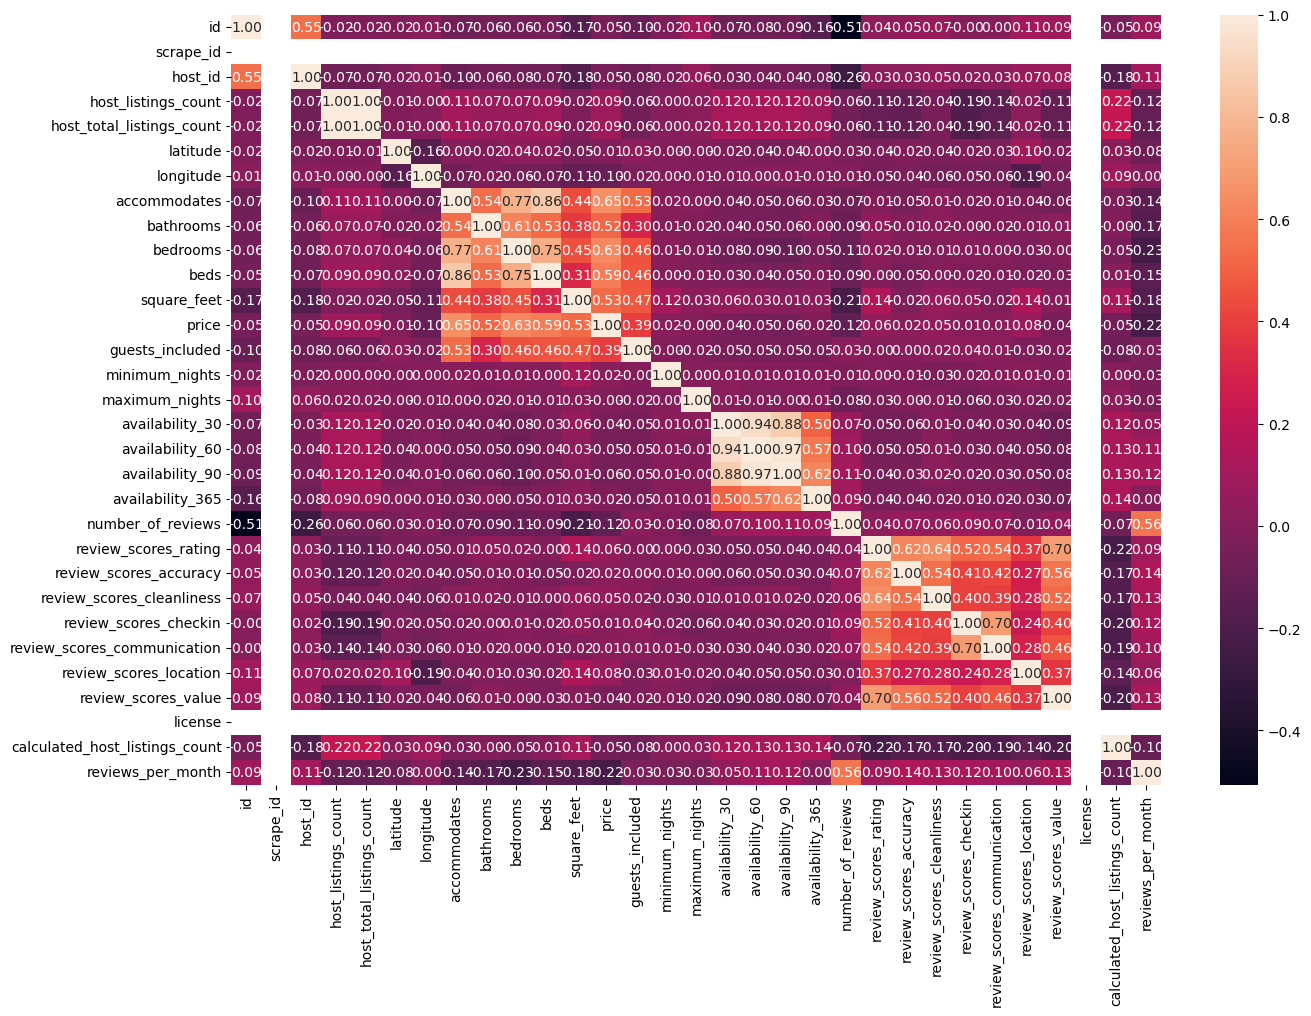

In [48]:
# Heatmap for Correlation  
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_lis.corr(), annot=True, fmt='.2f');
plt.savefig('4.png',bbox_inches='tight')

In [49]:
# Drop columns that are not required
col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit',       
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',
       'host_picture_url','street', 'neighbourhood_group_cleansed', 
       'square_feet', 'calendar_updated','requires_license', 'weekly_price', 'monthly_price', 
       'first_review','last_review','host_name','host_location','scrape_id','license','review_scores_rating' ,'review_scores_accuracy' 
       ,'review_scores_cleanliness','review_scores_checkin' ,'review_scores_communication' ,'review_scores_location','review_scores_value']

df_lis.drop(col, axis =1, inplace=True)

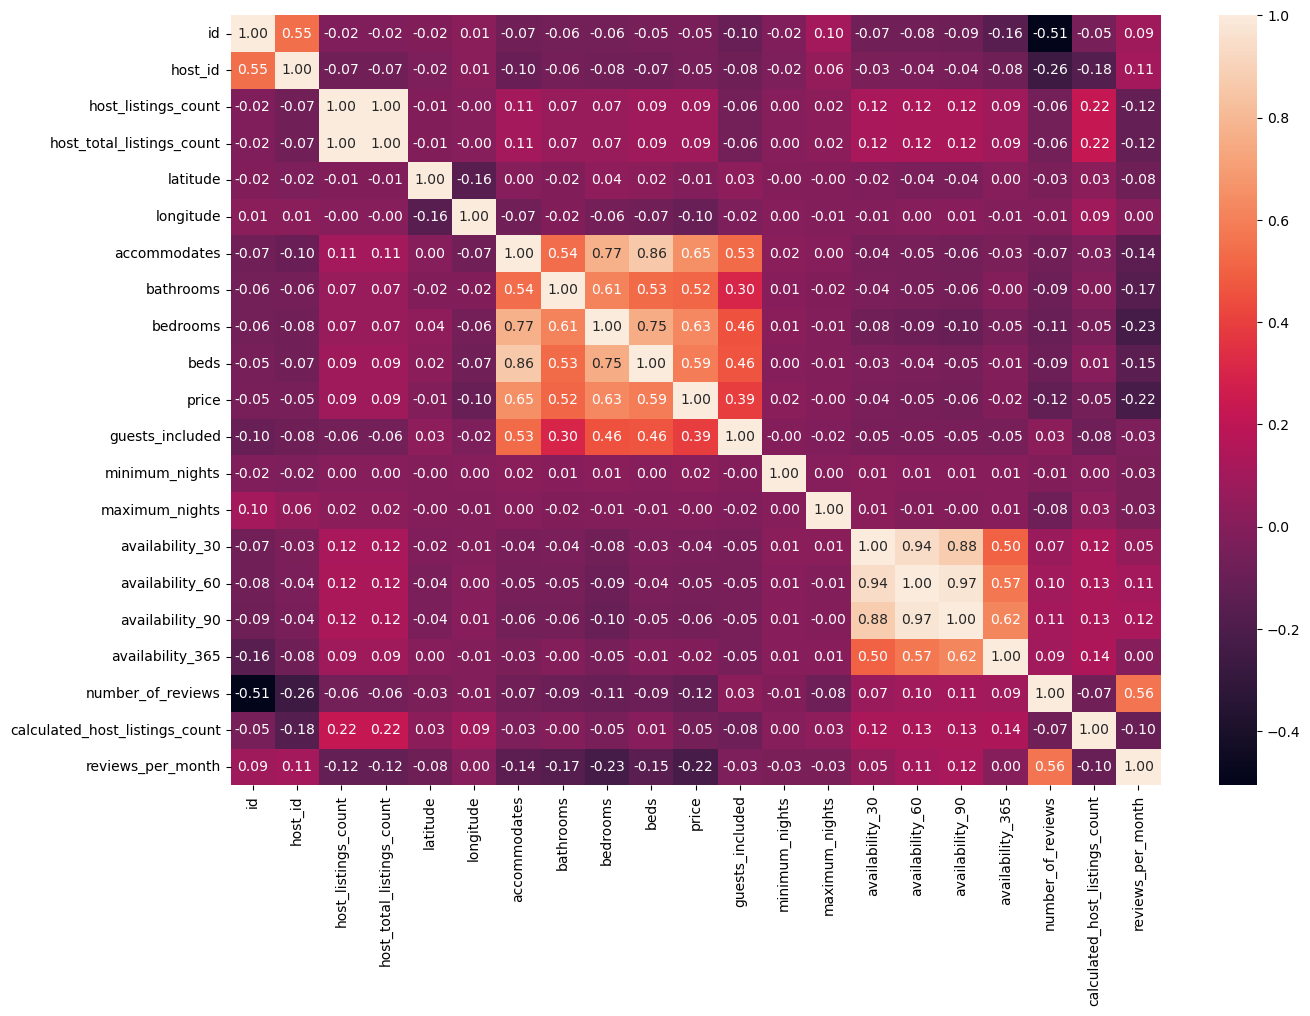

In [50]:
# Heatmap for Correlation  
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_lis.corr(), annot=True, fmt='.2f');
plt.savefig('4.png',bbox_inches='tight')